# import

In [1]:
import sys
sys.path.insert(0, r'../../libraries/quetzal')
sys.path.insert(0, r'../../libraries/syspy')

from quetzal.model import stepmodel

import geopandas as gpd
from shapely import geometry

In [2]:
training_folder = '../../'
input_folder = training_folder + r'gis/inputs/'

# read_file

In [3]:
links = gpd.read_file(input_folder+'links.geojson', driver='GeoJSON')
nodes = gpd.read_file(input_folder+'stops.geojson', driver='GeoJSON')
zones = gpd.read_file(input_folder+'zones.geojson', driver='GeoJSON')

# set_index with node IDs

In [5]:
nodes.set_index('stop_id', inplace=True)

# cut with convex hull

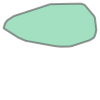

In [9]:
road_nodes = gpd.read_file(input_folder+'road_nodes.geojson', driver='GeoJSON')
convex_hull = geometry.MultiPoint(list(road_nodes['geometry'])).convex_hull.buffer(0.002)
convex_hull

In [11]:
%matplotlib inline

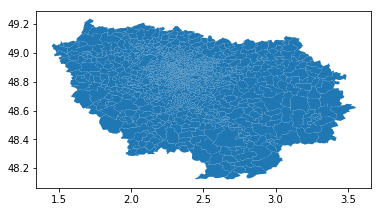

In [12]:
zones.plot()

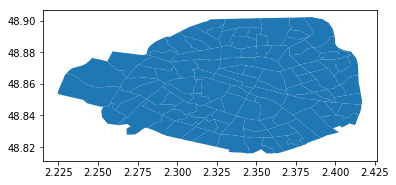

In [13]:
%matplotlib inline

def cut(gdf, stencil):
    contained = gdf['geometry'].apply(lambda g: stencil.contains(g))
    return gdf.loc[contained]

cut(zones, convex_hull).plot()

# initialize_model

In [14]:
sm = stepmodel.StepModel()

Model epsg not defined: setting epsg to default one: 4326
Model coordinates_unit not defined: setting coordinates_unit to default one: degree


In [16]:
sm.links = cut(links, convex_hull)
sm.nodes = cut(nodes, convex_hull)
sm.zones = cut(zones, convex_hull)

In [17]:
sm.jesaispasquoi  = 'tralala'

In [18]:
sm.to_hdf(training_folder + r'model/preparation/base.hdf')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 27/27 [00:01<00:00, 16.41it/s]


# json

In [21]:
projected = sm.change_epsg(2154, coordinates_unit='meter')

Reprojecting model from epsg 4326 to epsg 2154: 100%|██████████████████████████████████| 27/27 [00:00<00:00, 51.17it/s]


In [22]:
projected.to_json(training_folder + r'model/last')

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 27/27 [00:05<00:00,  4.78it/s]
